Welcome DataHacker!
 
Congratulations on your new job! This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

# Objective

# Forecast the traffic on JetRail for the next 7 months

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [48]:
data=pd.read_csv('Train_SU63ISt.csv',parse_dates=[1],header=0,index_col=1, squeeze=True)
data.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


At this point our data is in  seris form 
we we a made our datetime the row data

In [53]:
data.dtypes

ID       int64
Count    int64
dtype: object

In [54]:
#checking the size of our data
data.size

36576

In [55]:
#cahnging the data into a dataframe
jet_data=pd.DataFrame(data)
jet_data.head(4)

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2


so our data is in the dataframe so it is easy to process and analyse

In [52]:
jet_data.tail(4)

,ID,Count
Datetime,,
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702
2014-09-25 22:00:00,18286,580
2014-09-25 23:00:00,18287,534


In [63]:
jet_data.drop(['ID'],axis=1,inplace=True)

In [64]:
#acessing our data in the year 2012
jet_data['2012'].head()


,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [65]:
jet_data.describe()

,Count
count,18288.000000
mean,138.958115
std,153.467461
min,2.000000
25%,22.000000
50%,84.000000
75%,210.000000
max,1244.000000


The least amount of jet passangers was 2 

The highest was  1244

The standard deviation (average spread from the mean) is relatively large at 153 passangers.

The mean is about 138, which we might consider our level in this data.

The number of observations (count) matches our expectation, meaning we are handling the data correctly.

The percentiles along with the standard deviation do suggest a large spread to the data

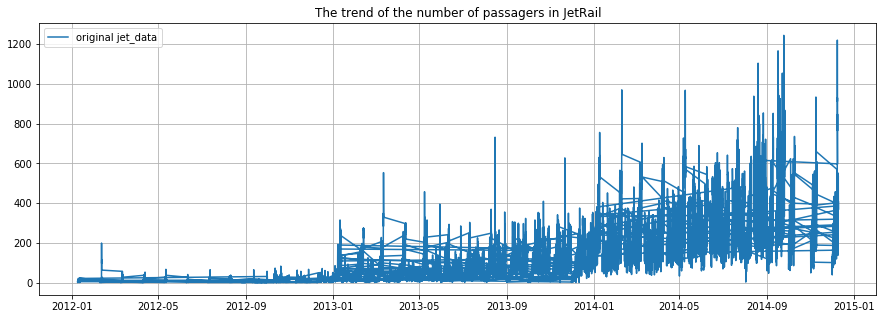

In [66]:
#plotting the details
plt.figure(figsize=(15,5))
plt.plot(jet_data,label='original jet_data')
plt.legend(loc='best')
plt.title("The trend of the number of passagers in JetRail")
plt.grid()


There may be an increasing trend of number of passangers over time until mid 2014

The seasonal signal appears to be growing over time, suggesting a multiplicative relationship (increasing change).

There do not appear to be any obvious outliers.

The seasonality suggests that the series is almost certainly non-stationary.

Text(0.5, 1.0, 'The trend of the number of passangers in jetrail')

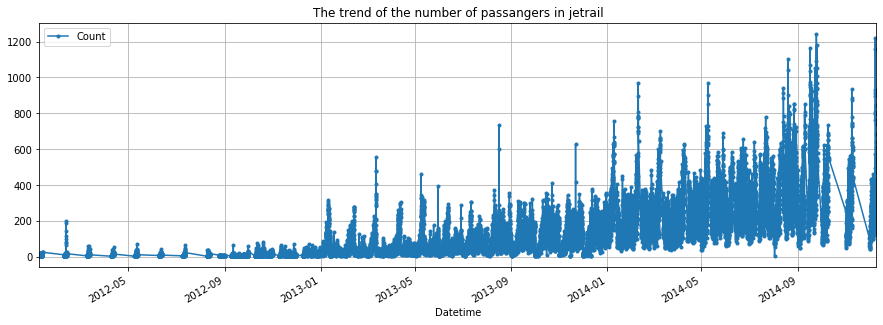

In [70]:
jet_data.plot(style='.-',label='original data',figsize=(15,5))
plt.legend(loc='best')
plt.grid()
plt.title("The trend of the number of passangers in jetrail")

# Seasonal Line Plots

Confirm the assumption that the seasonality is a yearly cycle by eyeballing line plots of the dataset by year.

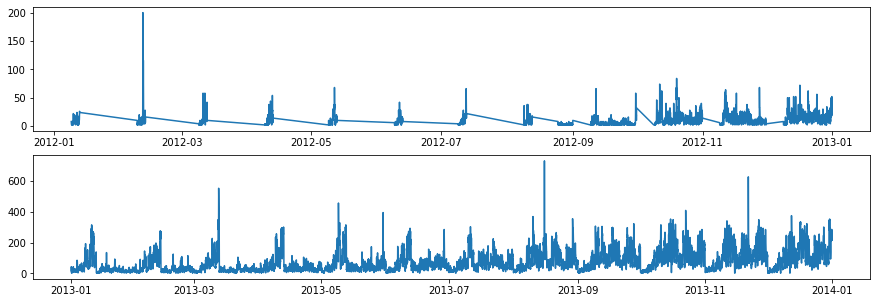

In [89]:

from pandas import Grouper
groups = jet_data['2012':'2013'].groupby(Grouper(freq='A'))
years =pd.DataFrame()
plt.figure(figsize=(15,5))
i = 1
n_groups = len(groups)
for name, group in groups:
    plt.subplot((n_groups*100) + 10 + i)
    i += 1
    plt.plot(group)
plt.show()

Text(0.5, 1.0, 'Distribution of the number of jetrail passangers')

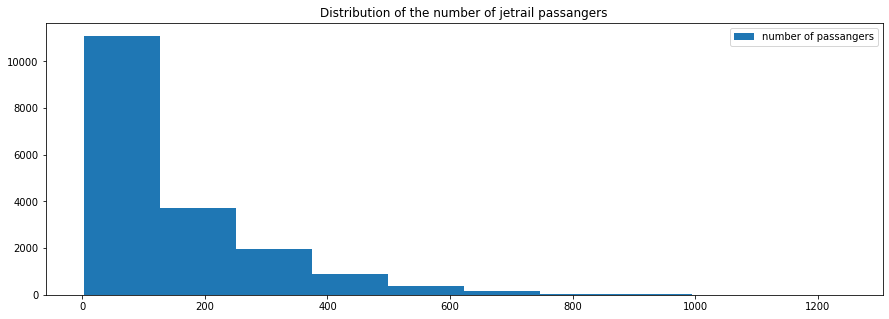

In [71]:
#check out the distibution of the passangers 
jet_data.hist(figsize=(15,5),label='number of passangers')
plt.legend(loc='best')
plt.grid()
plt.title('Distribution of the number of jetrail passangers')

THe data is not normally distibuted and the number is dropping

# Density Plot

plots of the density of observations can provide further insight into the structure of the data.


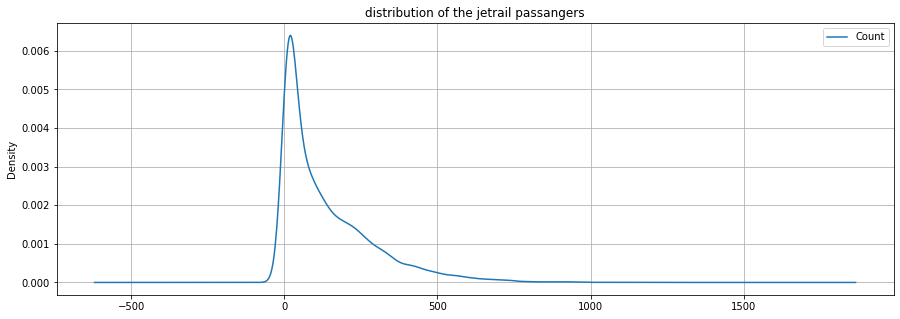

In [73]:
jet_data.plot(kind='kde',figsize=(15,5))
plt.title('distribution of the jetrail passangers')
plt.grid()

The distribution is not Gaussian.

The shape has a long right tail and may suggest an exponential distribution

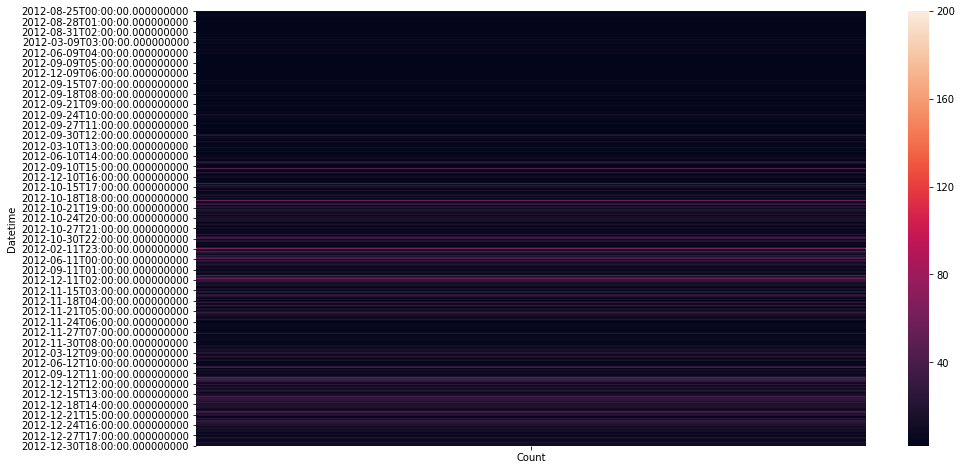

In [81]:
#plotting of the heatmap to check their correlation
plt.figure(figsize=(15,8))
sns.heatmap(jet_data['2012'])

# lag_plot

Text(0.5, 1.0, 'Relationshp between the lags')

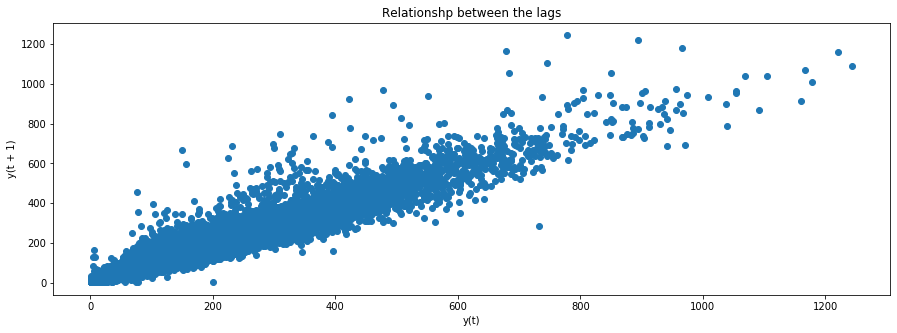

In [111]:
from pandas.plotting import lag_plot
plt.figure(figsize=(15,5))
lag_plot(jet_data)
plt.title('Relationshp between the lags')

Strong positive correlation between observations and their lag1 values.

# Time Series Autocorrelation Plots

Text(0.5, 1.0, 'The streght of the relationship of the lags')

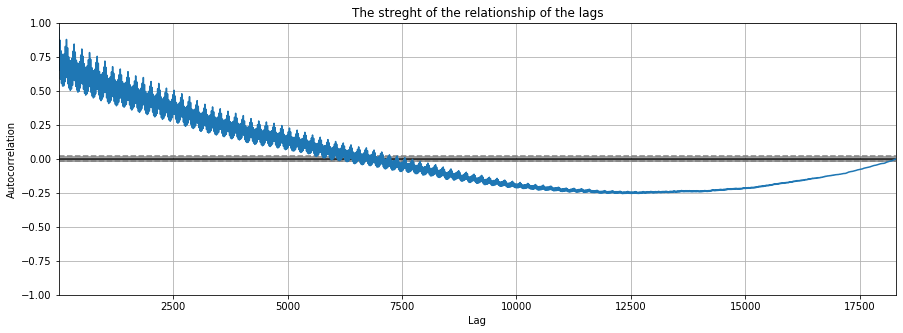

In [114]:
from  pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,5))
autocorrelation_plot(jet_data)
plt.title("The streght of the relationship of the lags")

The coleraltion  from the beginning up to around 6500 are sighnificant hence  providing aa threshold cutoff for 

selecting the more relevant lags

# Persistence Algorithm
 
Which act as our baseline.

Provide both a template for evaluating models using the proposed test harness and a performance measure by which

all more elaborate predictive models can be 

This is where the observation from the previous time step is used as the prediction for the observation at the next time step.



## creating the lagged dataset

In [117]:
values=pd.DataFrame(jet_data.values)
dataframe=pd.concat([values.shift(1),values],axis=1)
dataframe.columns=['t-1','t+1']
dataframe.head(4)

,t-1,t+1
0,NaN,8
1,8.0,2
2,2.0,6
3,6.0,2


In [129]:
#spliting of the data
x=dataframe.values
train_size=int(len(x)*0.6)
train,test=x[1:train_size],x[train_size:]
train_x,train_y=train[0,:],train[:1,]
test_x,test_y=test[:,0],test[:,1]



In [130]:
#fuction of the persistence model which act as the base  model
def model_persitence(x):
    return x

 ### walk forward validation

In [131]:
from sklearn.metrics import mean_squared_error
predictions=list()
for x in test_x:
    yhat=model_persitence(x)
    predictions.append(yhat)
    
test_score= mean_squared_error(test_y,predictions)
print('Test MSE: %.3f' % test_score)




Test MSE: 3466.903


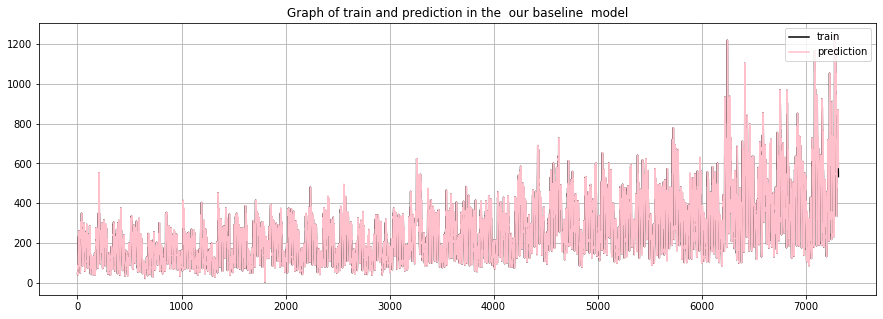

In [142]:
#plotting the training and the predicted
plt.figure(figsize=(15,5))
plt.plot(train_y)
plt.plot([None  for i in  train_y]+[x for  x in test_y],color='black',label='train')
plt.plot([None for i in train_y]+ [x for x in predictions],color='pink',label='prediction')
plt.legend(loc=True)
plt.title('Graph of train and prediction in the  our baseline  model')
plt.grid()

# Making the data statinary

In [174]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 

X = jet_data.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = jet_data.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -23.050917
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The results show that the test statistic value -23.05091 is smaller than the critical value at 1% of -3.431. This suggests that we can reject the null hypothesis with a significance level of less than 1%

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

# Diffencing of the time series data

In [187]:
jet_data['pass_diff']=jet_data['Count']-jet_data['Count'].shift(1)
jet_data['pass_diff']

Datetime
2012-08-25 00:00:00      NaN
2012-08-25 01:00:00     -6.0
2012-08-25 02:00:00      4.0
2012-08-25 03:00:00     -4.0
2012-08-25 04:00:00      0.0
                       ...  
2014-09-25 19:00:00    188.0
2014-09-25 20:00:00   -136.0
2014-09-25 21:00:00    -30.0
2014-09-25 22:00:00   -122.0
2014-09-25 23:00:00    -46.0
Name: pass_diff, Length: 18288, dtype: float64

In [203]:
# jet_data['pass_diff'].dropna().plot(figsize=(15,5))
# plt.title('Statinary plot of jet-data')

Text(0.5, 1.0, 'Statinary plot of jet-data')

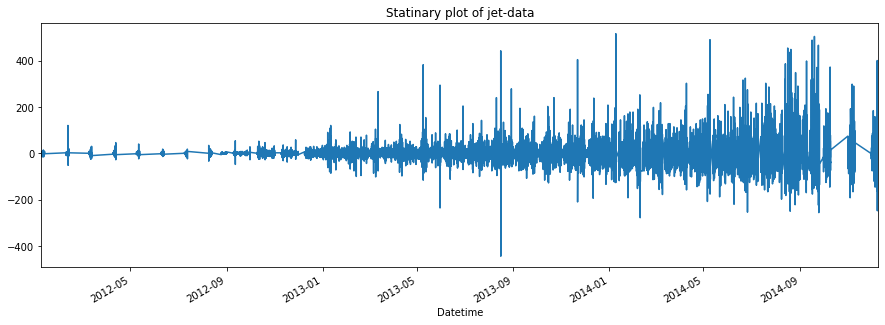

In [202]:
final=jet_data['pass_diff'].dropna()
final.plot(figsize=(15,5))
plt.title('Statinary plot of jet-data')

This method was just mean to get rid of varying mean and from this we can see that their is no trend hence our

data is statinary

# select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively

In [200]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

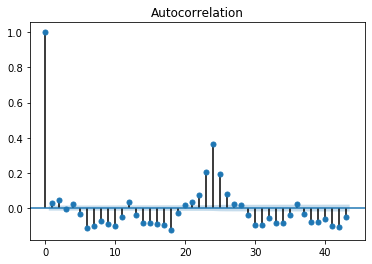

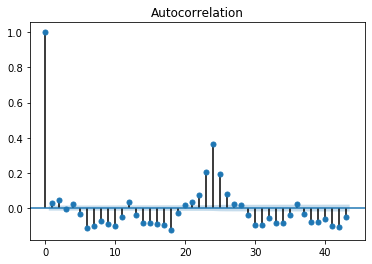

In [201]:
plot_acf(final,ax=plt.gca())

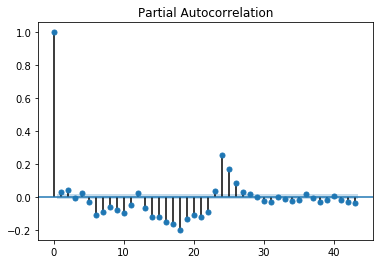

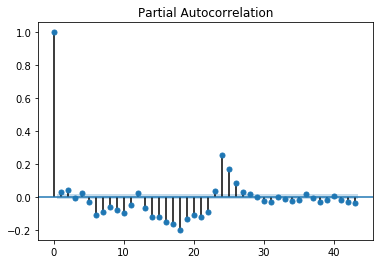

In [204]:
plot_pacf(final,ax=plt.gca())

The ACF shows a significant lag for 1 month.

The PACF shows a significant lag for 1 month, with perhaps some significant lag at 18 and 23 months.

Both the ACF and PACF show a drop-off at the same point, perhaps suggesting a mix of AR and MA.

### A good starting point for the p and q values is also 1.

# ARIMA

In [208]:
from statsmodels.tsa.arima.model import ARIMA

In [209]:
#fiiting the model
model=ARIMA(final,order=(1,0,1))

In [210]:
model_fit=model.fit()

In [211]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              pass_diff   No. Observations:                18287
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -93859.074
Date:                Sat, 19 Jun 2021   AIC                         187726.147
Time:                        08:57:01   BIC                         187757.403
Sample:                             0   HQIC                        187736.418
                              - 18287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0287      0.367      0.078      0.938      -0.691       0.748
ar.L1          0.4221      0.077      5.469      0.000       0.271       0.573
ma.L1         -0.3853      0.078     -4.913      0.0

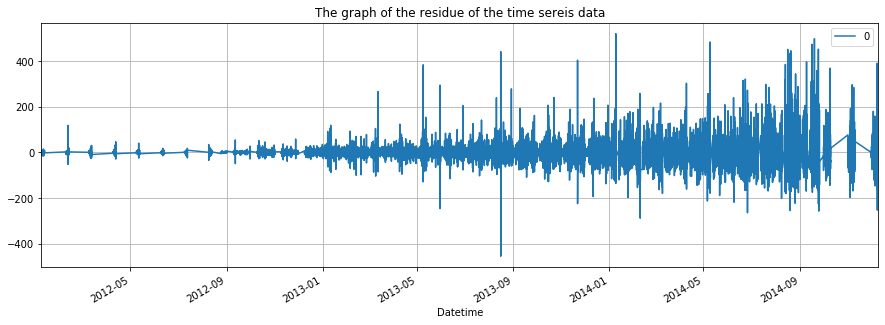

In [213]:
#ploting the residue
residual=pd.DataFrame(model_fit.resid)
residual.plot(figsize=(15,5))
plt.title('The graph of the residue of the time sereis data')
plt.grid()

 It show some trend are still remaining

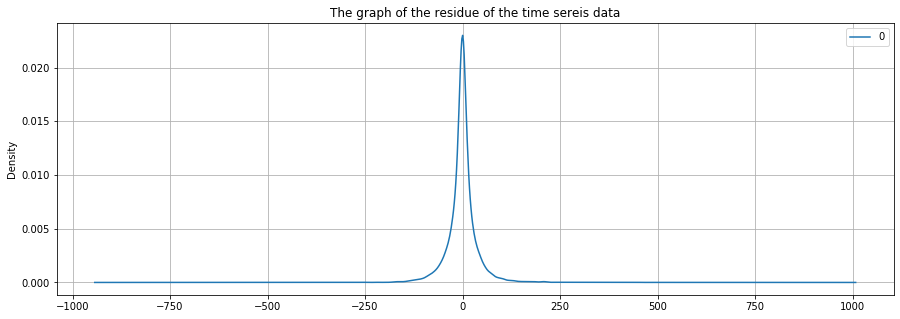

In [215]:
residual=pd.DataFrame(model_fit.resid)
residual.plot( kind='kde',figsize=(15,5))
plt.title('The graph of the residue of the time sereis data')
plt.grid()

It show  the error of the time series data at this point is normally distributed

In [218]:
#summary statistics of the residue
print(residual.describe())

                  0
count  18287.000000
mean      -0.000247
std       41.003029
min     -455.320875
25%      -13.373758
50%       -0.044661
75%       11.925259
max      519.988368


SO the highest residue in our ts is 519.988368 and the lowest is -455.320875

BY the fact taht mean is   -0.000247 it show that our data has very small errors

# Grid Search ARIMA Hyperparameters

# Prediction of the data

In [ ]:
#spliting the data
# xi=final.values
# size=int(len(xi)*0.60)
# train,test=xi[0:size],xi[size:len(xi)]
# history=[x for x in train]
# predictions=list()
# #walk-forward validation
# for t in range(len(test)):
#     model1=ARIMA(history,order=(1,0,1))
#     model1_fit=model1.fit()
#     output=model1_fit.forecast()
#     yhat=output[0]
#     predictions.append(yhat)
#     obs=test[t]
#     history.append(obs)
#     print('prediction=%f,expected=%f' %(yhat,obs))
    

In [ ]:
X = final.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
model = ARIMA(history, order=(4,1,1))
model_fit = model.fit()
output = model_fit.forecast()
yhat = output[0]
predictions.append(yhat)
obs = test[t]
history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
#evaluation of the nodel
rsme=(mean_squared_error(test,predictions))
print('Test rmse %.3f ' %rmse)

In [ ]:
#ploting of the predicted 
plt.figure(figsize=(15,5))
plt.plot(test,label='test')
plt.plot(predictions,color='green',label='prediction')
plt.legend(loc='best')
plt.grid()
plt.title("The predictions  of the time series data")
plt.show()